WeatherPy
----


In [3]:
pip install citipy

Processing /Users/Tyler/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353/citipy-0.0.5-py3-none-any.whl
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import Dependencies. 
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

import requests

import time

from scipy.stats import linregress

from pprint import pprint

from datetime import datetime

# Import API key from .py file.

from api_keys import api_key

# Use citipy to determine location of each city.

from citipy import citipy

# Load cities.csv from output_data file.

output_data_file = "output_data/cities.csv"

## Generate Cities List

In [2]:
# Input range of latitudes and longitudes - Latitude going up to 90 and Longitude going up to 180.

lat_range = (-90, 90)

lng_range = (-180, 180)

# Create empty lists for cities, countries, latitude, and longitude.

cities = []

countries = []

latitude_longitude = []


# Create random number generator for 500+ cities.

lats = np.random.uniform(low=-90.000, high=90.000, size=1200)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)

latitude_longitude = zip(lats, lngs)

# Calculate the nearest city from the random number that is generated.

for latitudes_longitudes in latitude_longitude:

    city = citipy.nearest_city(latitudes_longitudes[0], latitudes_longitudes[1]).city_name
    
    country = citipy.nearest_city(latitudes_longitudes[0], latitudes_longitudes[1]).country_code
    
    # If the city is unique, then append it to a our cities list. Then append the country that city is in.
    
    if city not in cities:
    
        cities.append(city)
        
        countries.append(country)
        
# Combine the city and country lists to output a complete location.

city_country_list = zip(cities,countries)

# Print out cities.

print(len(cities)) 

523


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Add URL and establish units (Metric).

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

# Create empty lists to hold all needed information.

date = []
temperature = []
humidity = []
wind_speed = []
cloudiness = []
lat = []
lng = []
city_number = []
city_name = []
country = []

# Open files to print results of the API calls - log and csv.

the_print_log = open("weather_log.txt", "w")

csv_data = open("weather_data.csv","w")

# Write header for csv. 

csv_data.write("date,city_number,city_name,country,lat,lng,temperature,cloudiness,wind_speed,humidity\n")

# Loop through data for city information.

for city,country_code in city_country_list:
    
    query_url = f"{url}appid={api_key}&q={city},{country_code}&{units}"
    
    response = requests.get(query_url).json()
    
    # Try finding the temperature, humidity, wind speed, and cloudiness within the API.
    
    try:
        
        time = (datetime.fromtimestamp(response["dt"])).strftime("%m/%d/%y")
        
        temps = response["main"]["temp"]
        
        humid = response["main"]["humidity"]
        
        wind = response["clouds"]["all"]
        
        cloud = response["wind"]["speed"]
        
        lat_value = response["coord"]["lat"]
        
        lng_value = response["coord"]["lon"]
        
        city_value = int(response["id"])
        
        city_names = response["name"]
        
        country_name = response["sys"]["country"]
        
        # Append information above to lists.
        
        date.append(time)
        temperature.append(temps)
        humidity.append(humid)
        wind_speed.append(wind)
        cloudiness.append(cloud)
        lat.append(lat_value)
        lng.append(lng_value)
        city_number.append(city_value)
        city_name.append(city_names)
        country.append(country_name)
        
        # Print data to text file. 
        
        print(f"{city_names} is in the Weathermap API\n")
        the_print_log.write(f"{city_names} is in the Weathermap API\n")
        
    # except to finish the try statement
    except:
        
        #Print data to csv file - date,city_number,city_name,country,lat,lng,temperature,cloudiness,wind_speed,humidity.
        
        csv_data.write(f"{time},{city_value},{city_names},{country_name},{lat_value},{lng_value},{temps},{cloud},{wind},{humid}\n")
        
        # Append null values.
        
        date.append(None)
        temperature.append(None)
        humidity.append(None)
        wind_speed.append(None)
        cloudiness.append(None)
        lat.append(None)
        lng.append(None)
        city_number.append(None)
        city_name.append(None)
        country.append(None)
        pass
    
# Close the file handle after completion of the loop
the_print_log.close()
csv_data.close()
        

Cidreira is in the Weathermap API

Bovenden is in the Weathermap API

Vaini is in the Weathermap API

Cape Town is in the Weathermap API

Caravelas is in the Weathermap API

Chokurdakh is in the Weathermap API

Egvekinot is in the Weathermap API

Russell is in the Weathermap API

Korla is in the Weathermap API

Caucaia is in the Weathermap API

Kumul is in the Weathermap API

Sinnamary is in the Weathermap API

Chandrakona is in the Weathermap API

Aklavik is in the Weathermap API

Rikitea is in the Weathermap API

Quatre Cocos is in the Weathermap API

Jamestown is in the Weathermap API

Ushuaia is in the Weathermap API

Vikhorevka is in the Weathermap API

Kapaa is in the Weathermap API

Thānesar is in the Weathermap API

Atuona is in the Weathermap API

Shimoda is in the Weathermap API

Busselton is in the Weathermap API

Vao is in the Weathermap API

Lebu is in the Weathermap API

Maniitsoq is in the Weathermap API

Saint-Philippe is in the Weathermap API

Ponta do Sol is in the We

São José da Coroa Grande is in the Weathermap API

Tonk is in the Weathermap API

Cururupu is in the Weathermap API

Talnakh is in the Weathermap API

‘Ewa Beach is in the Weathermap API

College is in the Weathermap API

Guerrero Negro is in the Weathermap API

Nuuk is in the Weathermap API

Ekhabi is in the Weathermap API

Ankang is in the Weathermap API

Coffs Harbour is in the Weathermap API

Serenje is in the Weathermap API

Chabahar is in the Weathermap API

Redmond is in the Weathermap API

Honiara is in the Weathermap API

Mount Isa is in the Weathermap API

Juneau is in the Weathermap API

Pacific Grove is in the Weathermap API

Te Anau is in the Weathermap API

Sørland is in the Weathermap API

Ledyard Center is in the Weathermap API

Vostok is in the Weathermap API

Amarpur is in the Weathermap API

Bariloche is in the Weathermap API

Springbok is in the Weathermap API

Carutapera is in the Weathermap API

Kentau is in the Weathermap API

Mumford is in the Weathermap API

Am

San Carlos is in the Weathermap API

Takahagi is in the Weathermap API

Rusape is in the Weathermap API

Yārāda is in the Weathermap API

Almaznyy is in the Weathermap API

Suwałki is in the Weathermap API



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary from the lists.
weather_dictionary = {
    "city_id": city_number,
    "city_name": city_name,
    "country": country,
    "latitude": lat,
    "longitude": lng,
    "weather_date": date,
    "temp": temperature,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}

# Create dataframe from dictionary above.

weather_df = pd.DataFrame(weather_dictionary)

weather_df.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,3466165.0,Cidreira,BR,-30.18,-50.21,01/03/21,298.23,65.0,8.37,0.0
1,2945726.0,Bovenden,DE,51.58,9.93,01/03/21,273.34,86.0,3.35,100.0
2,4032243.0,Vaini,TO,-21.20,-175.20,01/03/21,297.15,100.0,3.60,75.0
3,3369157.0,Cape Town,ZA,-33.93,18.42,01/03/21,294.59,73.0,5.70,0.0
4,3466980.0,Caravelas,BR,-17.71,-39.25,01/03/21,301.31,65.0,5.02,0.0


In [5]:
# Drop all NA values (so linear regression can be done later).

# First drop the Na values.

clean_weather_df = weather_df.dropna()

# Reset the index

clean_weather_data = clean_weather_df.reset_index(drop=True)

# Change the datatype for the city_id field to an integer

clean_weather_data['city_id'] = clean_weather_data['city_id'].astype(int)

clean_weather_data.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,3466165,Cidreira,BR,-30.18,-50.21,01/03/21,298.23,65.0,8.37,0.0
1,2945726,Bovenden,DE,51.58,9.93,01/03/21,273.34,86.0,3.35,100.0
2,4032243,Vaini,TO,-21.20,-175.20,01/03/21,297.15,100.0,3.60,75.0
3,3369157,Cape Town,ZA,-33.93,18.42,01/03/21,294.59,73.0,5.70,0.0
4,3466980,Caravelas,BR,-17.71,-39.25,01/03/21,301.31,65.0,5.02,0.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

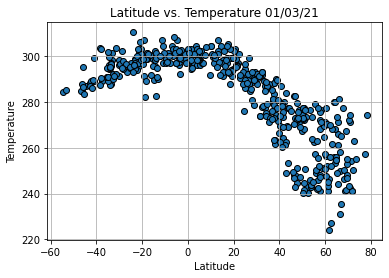

In [6]:
# Build a scatter plot for "Latitude vs. Temperature"
weather_time = clean_weather_data['weather_date'][0]

plt.scatter(clean_weather_data["latitude"], clean_weather_data["temp"], marker="o",edgecolors='black')

# Incorporate the other graph properties

plt.title(f"Latitude vs. Temperature {weather_time}")

plt.ylabel("Temperature")

plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("pngs/LatitudeVsTemperature.png")

plt.show()

# The equator equaling 0, this plot is showing the temperature changes as one moves north and south from the equator. The model is as expected, we are seeing higher temperatures closer to 0 (the equator) and lower as you move towards the poles. 

## Latitude vs. Humidity Plot

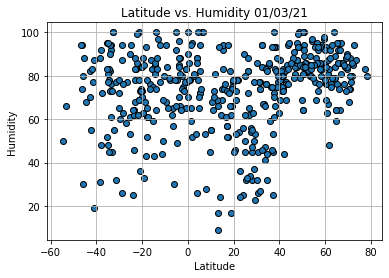

In [7]:
# Build a scatter plot for "Latitude vs. Humidity"

plt.scatter(clean_weather_data["latitude"], clean_weather_data["humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties

plt.title(f"Latitude vs. Humidity {weather_time}")

plt.ylabel("Humidity")

plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("pngs/LatitudeVsHumidity.png")

plt.show()

# This plot is showing the percent of humidity across different latitudes. The analysis is that humidity level seems to not be impacted by latitude.

## Latitude vs. Cloudiness Plot

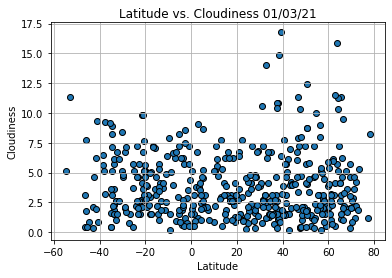

In [8]:
# Build a scatter plot for "Latitude vs. Cloudiness"

plt.scatter(clean_weather_data["latitude"], clean_weather_data["cloudiness"], marker="o",edgecolors='black')

# Incorporate the other graph properties

plt.title(f"Latitude vs. Cloudiness {weather_time}")

plt.ylabel("Cloudiness")

plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("pngs/LatitudeVsCloudiness.png")

plt.show()

# This plot is showing the cloud amount across different cities around the world. The graph shows that latitude does impact cloud level. (Around the -40's and 60's you seem to have a higher level of clouds)

## Latitude vs. Wind Speed Plot

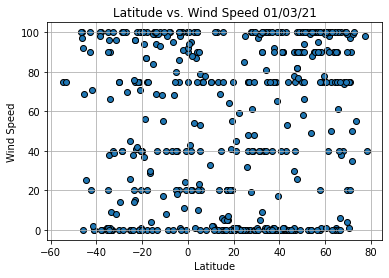

In [9]:
# Build a scatter plot for "Latitude vs. Wind Speed"

plt.scatter(clean_weather_data["latitude"], clean_weather_data["wind_speed"], marker="o",edgecolors='black')

# Incorporate the other graph properties

plt.title(f"Latitude vs. Wind Speed {weather_time}")

plt.ylabel("Wind Speed")

plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("pngs/LatitudeVsWindSpeed.png")

plt.show()

# This plot shows the wind speed of cities around the globe. Latitude does not impact wind speed, it would seem. 

## Linear Regression

In [10]:
# Make a function that accepts a list of x values and y values, creating a linear regression. 
#https://realpython.com/linear-regression-in-python/

# Create a string that determins which hemisphere is being used.

# The x,y coordinates to create the annotation of the equation on the graph.

def make_lin_reg_plot(x_values,y_values,x_desc,y_desc,hemisphere,filename,x_ann,y_ann):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values,edgecolors='black')
    
    plt.plot(x_values,regress_values,"r-")
    
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc} {weather_time}")
    
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=12,color="red")
    
    plt.xlabel(x_desc)
    
    plt.ylabel(y_desc)
    
    print(f"The r-squared is: {rvalue}")
    
    print(line_eq)
    
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames.

# Create the north and south hemisphere dataframes using booleans.

north = clean_weather_data.latitude > 0

south = clean_weather_data.latitude < 0

north_weather = clean_weather_data[north]

south_weather = clean_weather_data[south]

# The indexes will not be continuous so they need to be reset with drop=True.

north_weather = north_weather.reset_index(drop=True)

south_weather = south_weather.reset_index(drop=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8342192100421112
y = -0.81x + 307.36


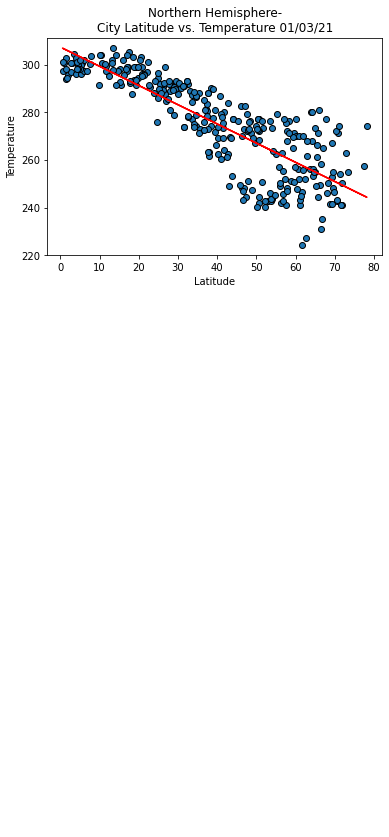

In [12]:
make_lin_reg_plot(north_weather["latitude"],north_weather["temp"],\
                  
                  'Latitude','Temperature','Northern Hemisphere',\
                  
                 'NothernTempLat.png',6,-20)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.643567325595921
y = 0.34x + 300.86


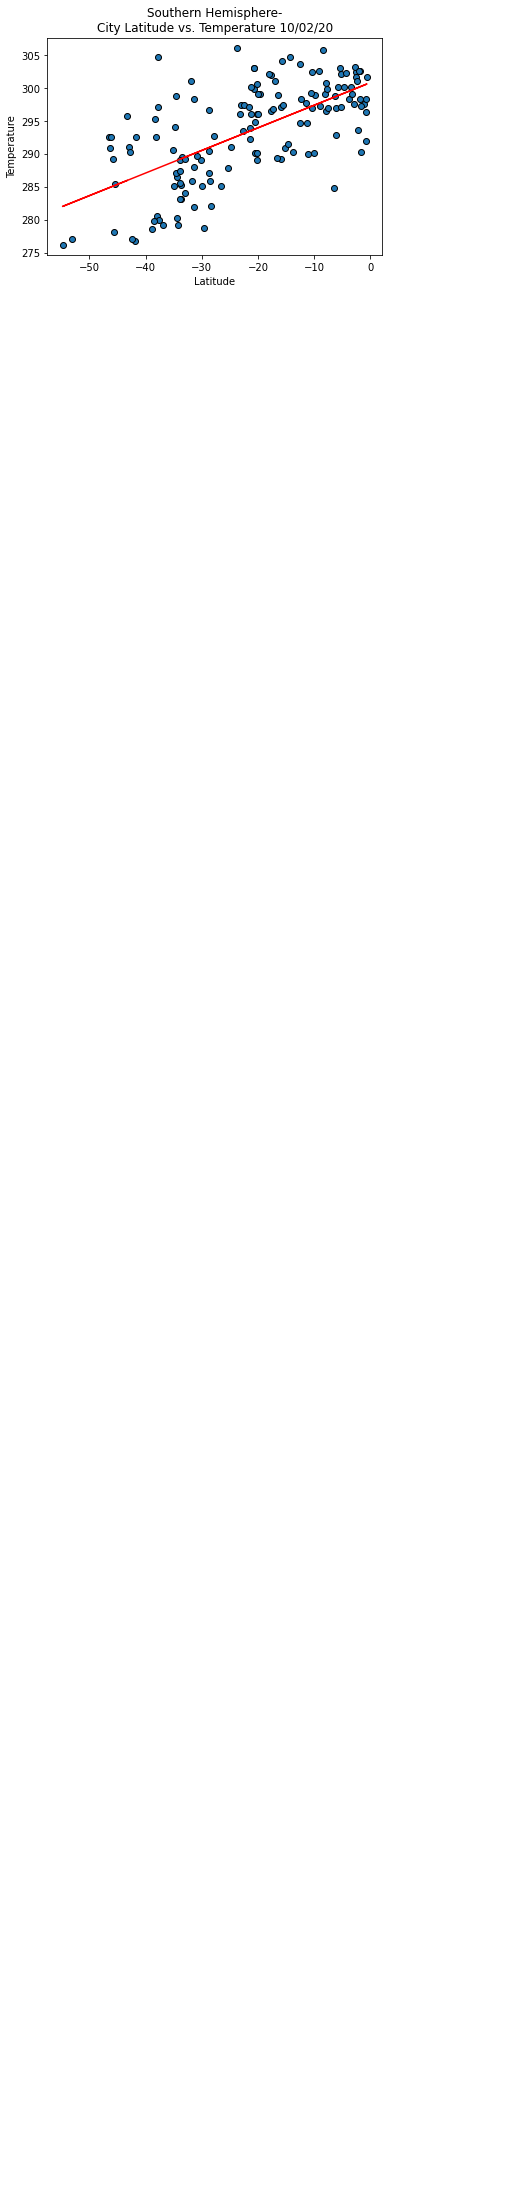

In [21]:
make_lin_reg_plot(south_weather["latitude"],south_weather["temp"],\
                  
                  'Latitude','Temperature','Southern Hemisphere',\
                  
                 'SouthernTempLat.png',6,-20)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06884746741639292
y = 0.06x + 71.69


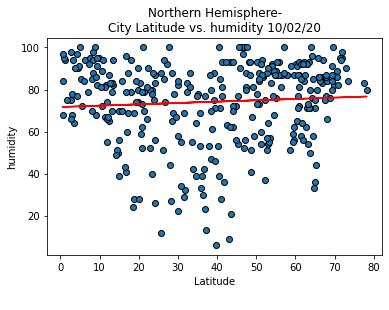

In [22]:
make_lin_reg_plot(north_weather["latitude"],north_weather["humidity"],\
                  
                  'Latitude','humidity','Northern Hemisphere',\
                  
                 'NorthHumidityLat.png',6,-20)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.29977472600822147
y = 0.4x + 77.74


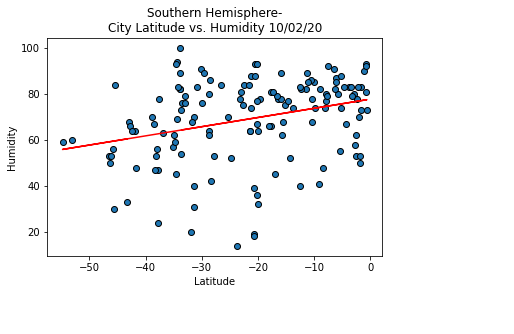

In [23]:
make_lin_reg_plot(south_weather["latitude"],south_weather["humidity"],\
                  
                  'Latitude','Humidity','Southern Hemisphere',\
                  
                 'SouthernHumidityLat.png',6,-20)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2574771096390841
y = 0.03x + 2.41


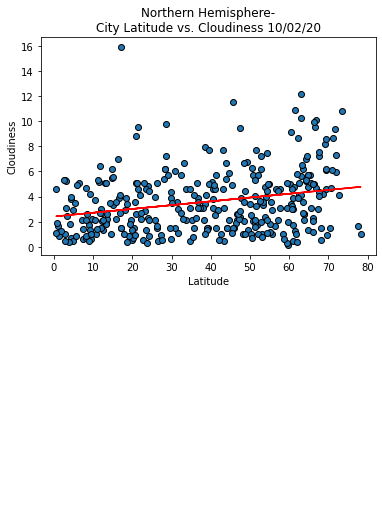

In [24]:
make_lin_reg_plot(north_weather["latitude"],north_weather["cloudiness"],\
                  
                  'Latitude','Cloudiness','Northern Hemisphere',\
                  
                 'NorthernCloudinessLat.png',6,-20)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.1552468417316917
y = -0.03x + 3.39


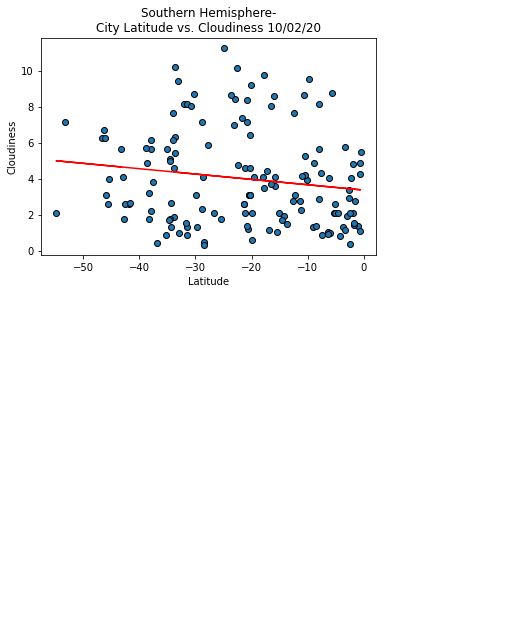

In [25]:
make_lin_reg_plot(south_weather["latitude"],south_weather["cloudiness"],\
                  
                  'Latitude','Cloudiness','Southern Hemisphere',\
                  
                 'SouthernCloudinessLat.png',6,-20)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03800238592150114
y = 0.07x + 54.2


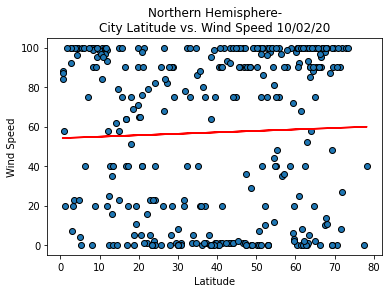

In [26]:
make_lin_reg_plot(north_weather["latitude"],north_weather["wind_speed"],\
                  
                  'Latitude','Wind Speed','Northern Hemisphere',\
                  
                 'NorthernWindLat.png',6,-20)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07492176888727939
y = 0.22x + 52.12


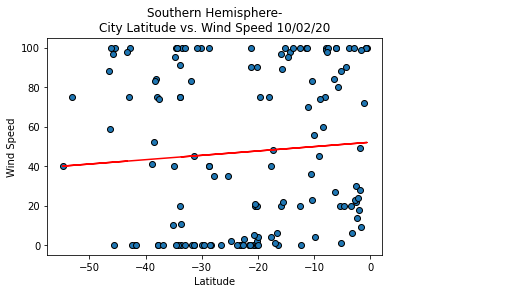

In [27]:
make_lin_reg_plot(south_weather["latitude"],south_weather["wind_speed"],\
                  
                  'Latitude','Wind Speed','Southern Hemisphere',\
                  
                 'SouthernWindLat.png',6,-20)